In [1]:
import sys
sys.path.append('d:\\QUANT_GAME\\python_game\\factor\\factor_lab\\analyze_note')
from analyze_factor_note_init import AnalyzeFactorNotes as Note

---

### 初始化条件

In [2]:
factor_name = 'impluse'
start_date = 20100101
end_date = 20210101
med_tf = False
z_score_tf = False
demean_tf = False
sample_num = None
sample_every_date_tf = False

In [3]:
note = Note(factor_name, start_date, end_date,
                med_tf, z_score_tf, demean_tf,
                sample_num,sample_every_date_tf
            )

#### 加载数据

In [4]:
note.load_data()

---

#### 查看因子相关信息

##### - 因子定义及计算公式

因子名称：冲量因子(impluse),m2v2-m1v1  
因子定义： t时刻的价格速度* t时刻的价格 - t-delta_t时刻的价格速度* t-delta_t时刻的价格
$$
PriceSpeed_t = \frac{Price_t - Price_{t-1}}{Price_{t-1}}   
$$

$$
factor = PriceSpeed_t * Price_t - PriceSpeed_{t-\delta t} * Price_{t-\delta t}
$$

#### -因子信息

In [5]:
factor_info = note.get_factor_info()
for k,v in factor_info.items():
    print(k,':',v)

name : impluse
fields : ['close']
other_dIepend_factors : ['price_speed_change']
calc_params : {'v_period': 1, 'delta_period': 20}
save_h5_path : F:\factor_lab_res\prepared_data\factor_data.h5
value_range : [-22347.188, 19155.43]
process_suggest_method : standardization


---

### 因子分析

In [6]:
note.get_data_for_analysis()

In [7]:
zy_fa = note.analysis_factor()

#### 绘制factor-return散点图

- 全部数据

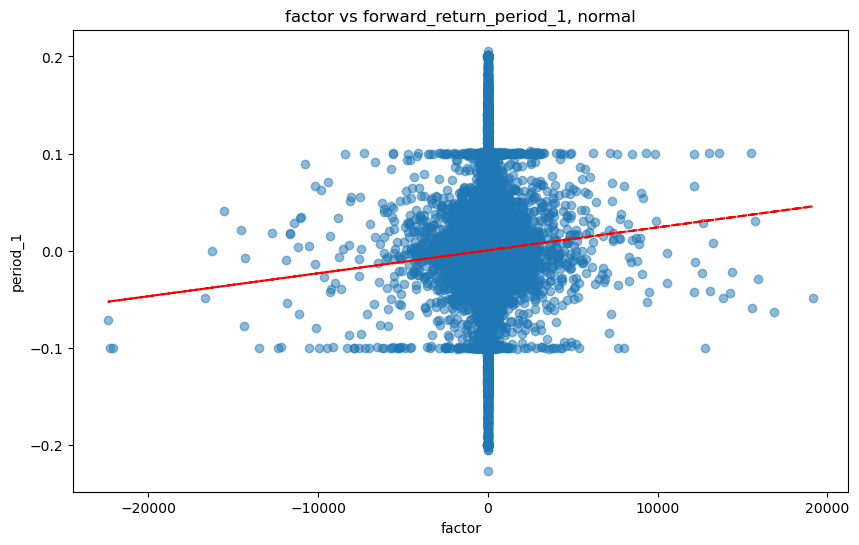

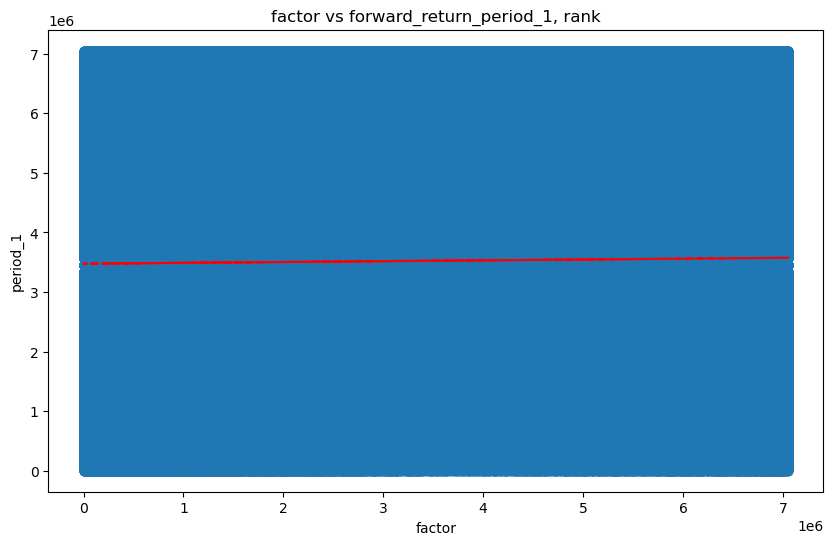

In [8]:
# normal
zy_fa.plot_scatter_and_regression(periods_list=[1,],sample_num=None)
# rank
zy_fa.plot_scatter_and_regression(periods_list=[1,],rank_tf=True,sample_num=None)

- 抽样100000

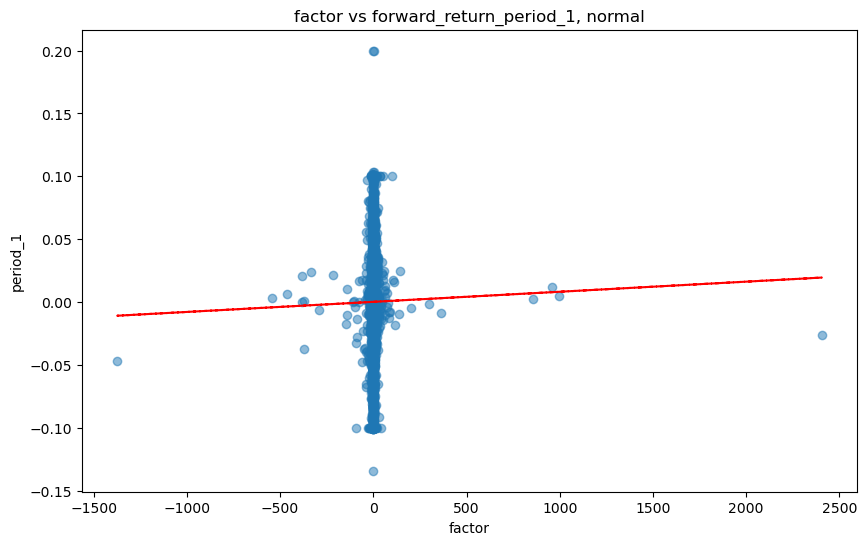

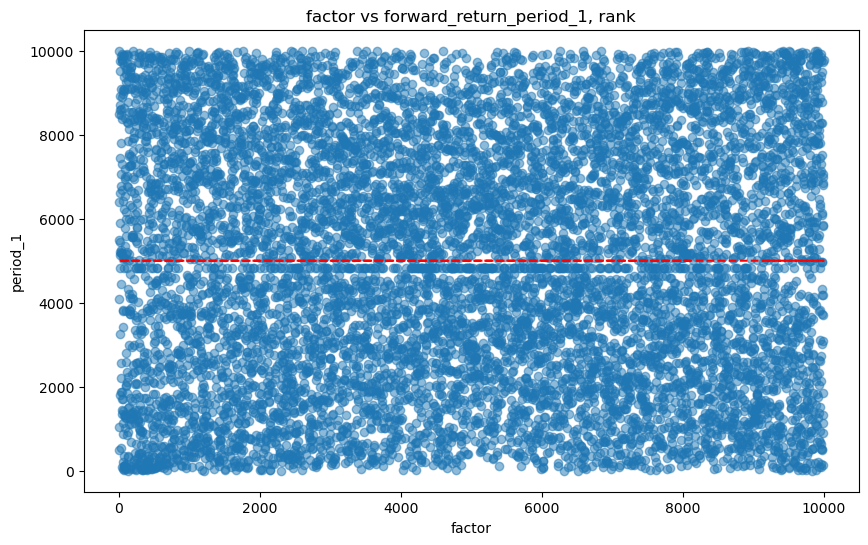

In [9]:
# normal
zy_fa.plot_scatter_and_regression(periods_list=[1,],sample_num=10000)
# rank
zy_fa.plot_scatter_and_regression(periods_list=[1,],rank_tf=True,sample_num=10000)

### 绘制因子分布图

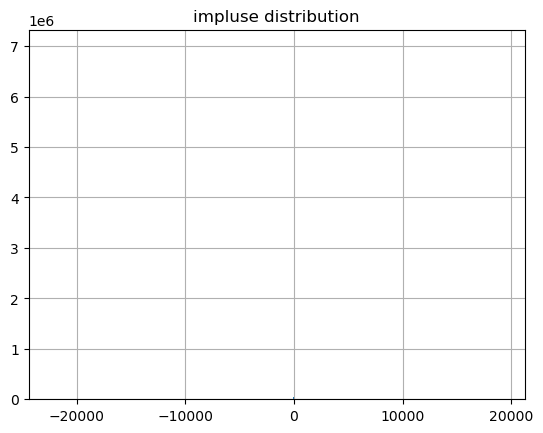

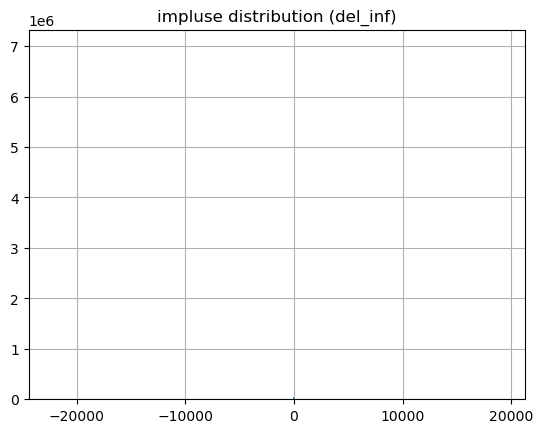

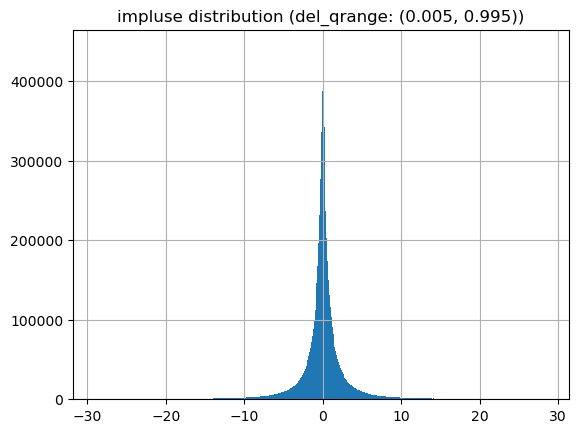

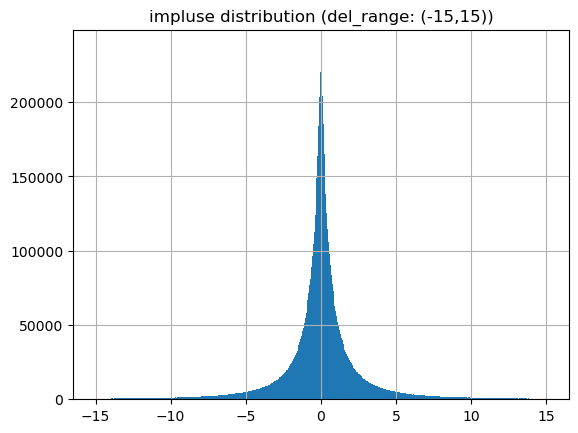

In [10]:
# 原始因子分布图
zy_fa.plot_factor_hist()
# 剔除inf后的因子分布图
zy_fa.plot_factor_hist(del_inf=True)
# 截取分位数qrange的因子分布图
zy_fa.plot_factor_hist(del_qrange=(0.005,0.995))
# 截取给定range的因子分布图
zy_fa.plot_factor_hist(del_range=(-15,15))

---

#### IC

#### 打印因子ic分析结果

In [11]:
analyze_ic_res = zy_fa.analyze_ic_res()
print('analyze_ic_res:\n',analyze_ic_res)


analyze_ic_res:
                       period_1  period_2  period_3  period_5  period_8  \
norm_ic_mean          0.002395  0.001354  0.001378  0.000249  0.000602   
norm_ic_std           0.026108  0.025373  0.024679   0.02403  0.023939   
norm_ic_0.02_percent       NaN       NaN       NaN       NaN       NaN   
norm_ic_t                  NaN       NaN       NaN       NaN       NaN   
norm_ir               0.091736  0.053378  0.055834   0.01036  0.025167   
norm_abs_ic           0.005346  0.003104  0.003257  0.003434   0.00444   
rank_ic_mean         -0.003165 -0.007399 -0.006815 -0.013506 -0.008022   
rank_ic_std            0.09243  0.088879  0.087447  0.087407  0.085003   
rank_ic_0.02_percent       NaN       NaN       NaN       NaN       NaN   
rank_ic_t                  NaN       NaN       NaN       NaN       NaN   
rank_ir              -0.034239 -0.083251  -0.07793 -0.154517 -0.094373   
rank_abs_ic           0.014078  0.012023  0.016548   0.00784  0.010734   

                    

---

#### 绘制norm_ic的时序图

<Figure size 640x480 with 0 Axes>

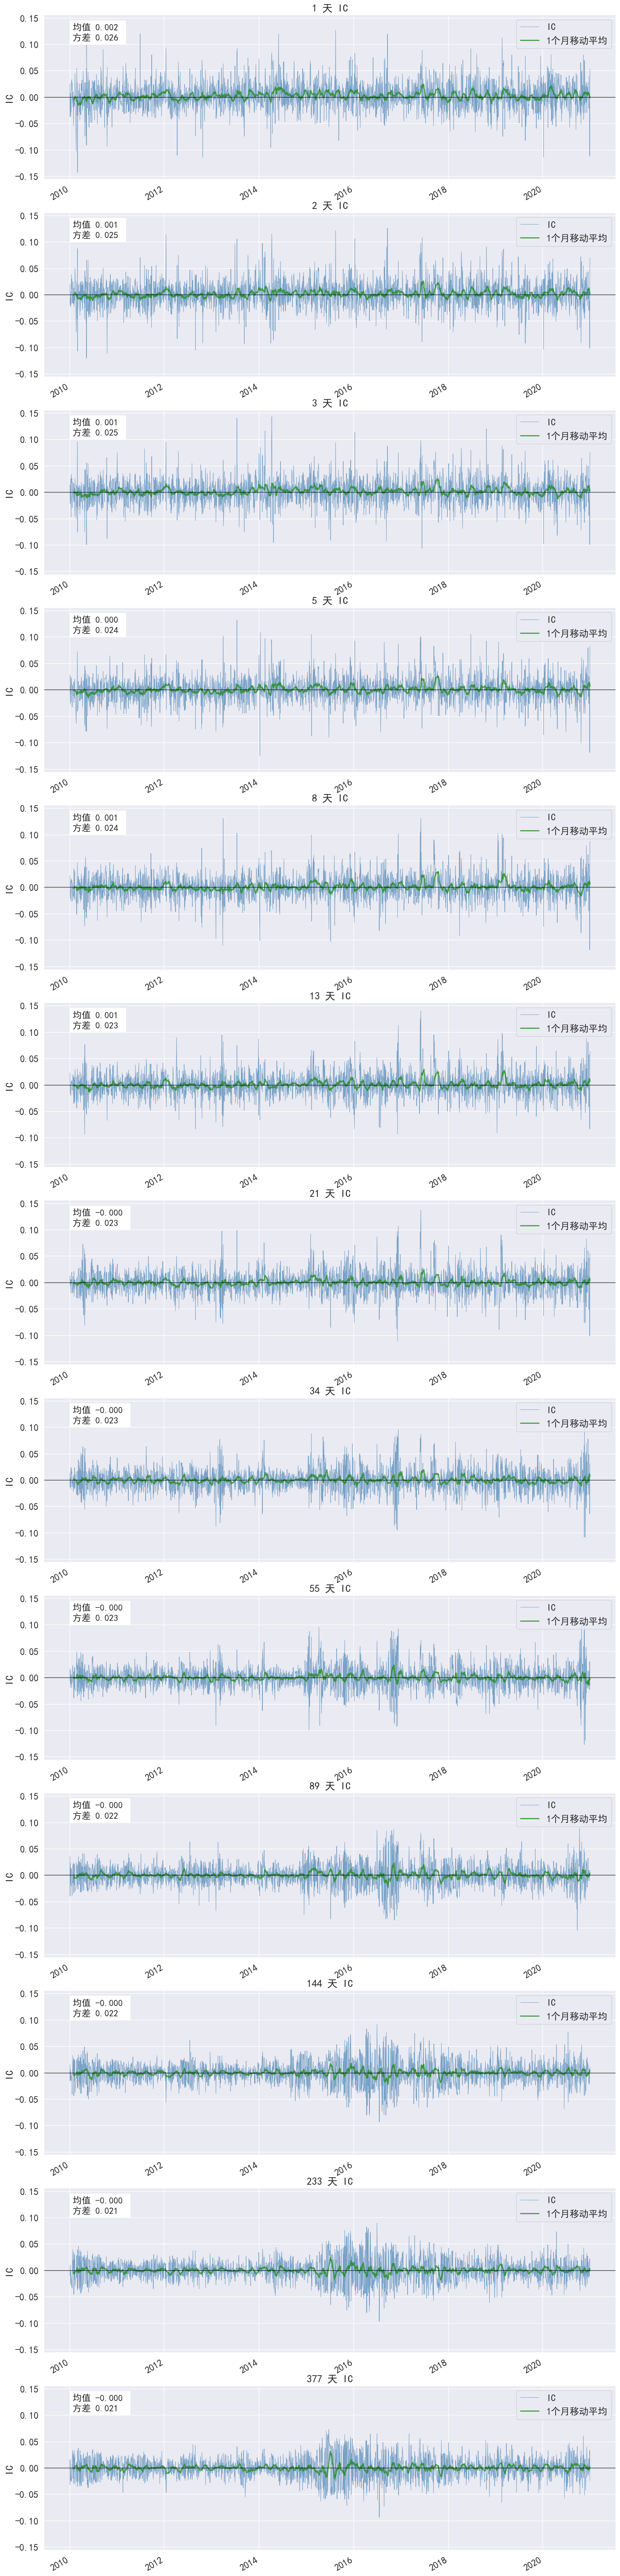

In [12]:
zy_fa.plot_norm_ic_ts()

---

#### 绘制rank_ic的时序图

<Figure size 640x480 with 0 Axes>

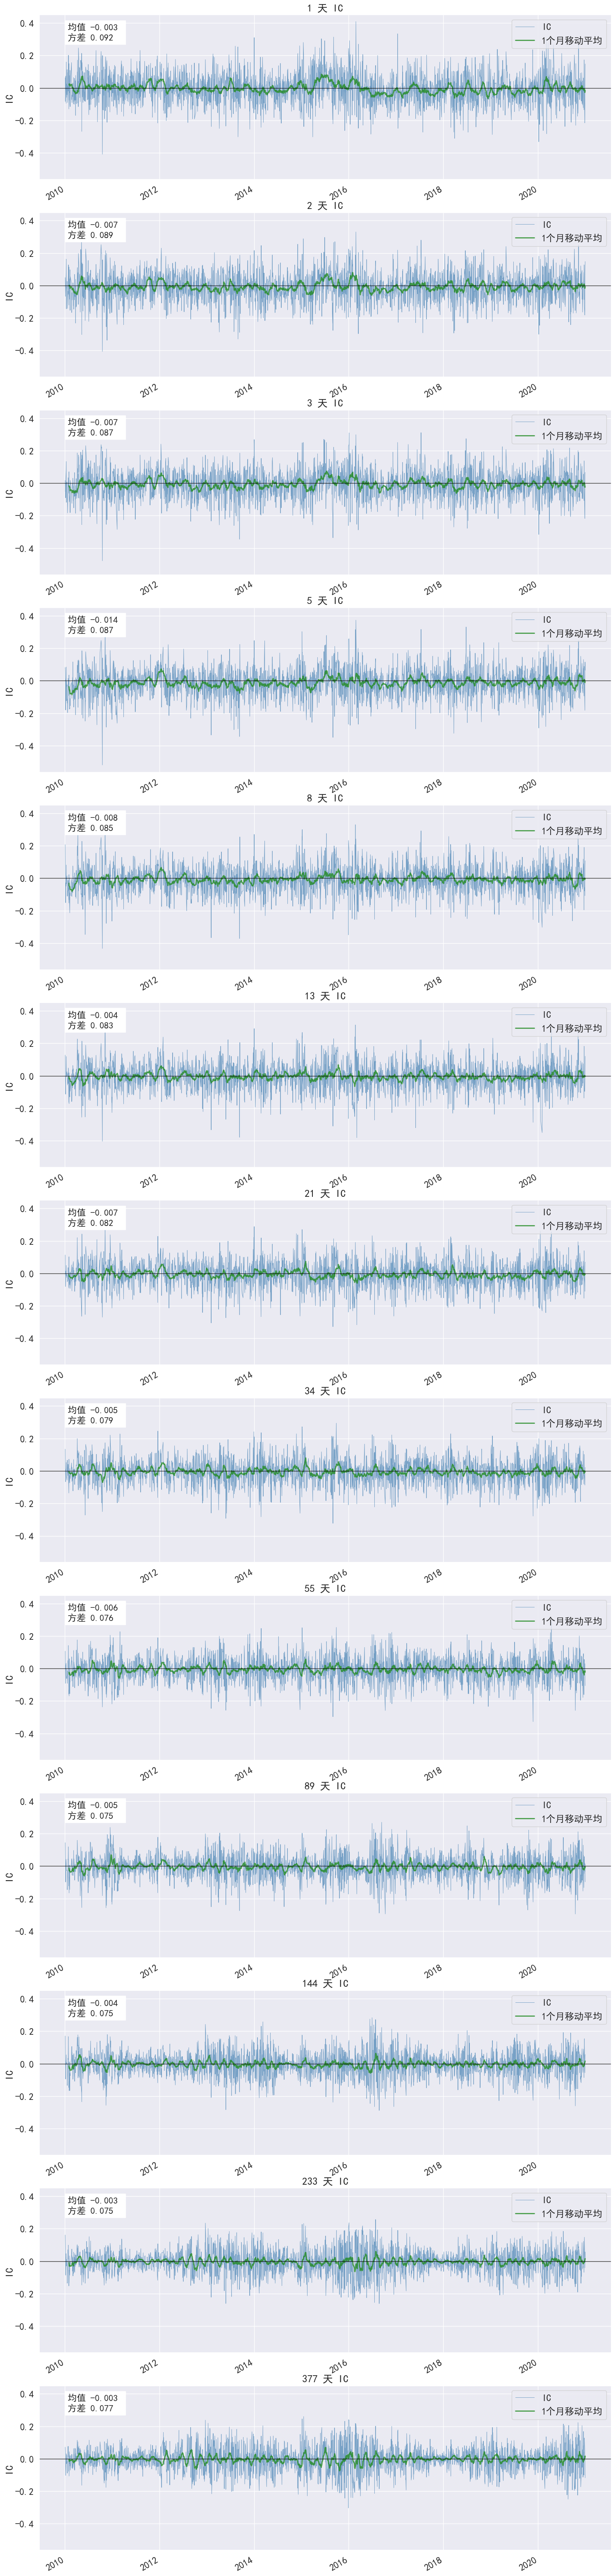

In [13]:
zy_fa.plot_rank_ic_ts()